In [1]:
from packaging import version

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
import tensorboard as tb
import os
from tensorflow.python.summary.summary_iterator import summary_iterator
import tensorflow as tf

In [2]:
major_ver, minor_ver, _ = version.parse(tb.__version__).release
assert major_ver >= 2 and minor_ver >= 3, \
    "This notebook requires TensorBoard 2.3 or later."
print("TensorBoard version: ", tb.__version__)
sns.set_theme(style="darkgrid")

TensorBoard version:  2.4.1


In [3]:
def read_data(path):
    filenames = [filename for filename in os.listdir(path) if not os.path.isdir(os.path.join(path, filename))]
    data_list = []
    for filename in filenames:
        data = []
        last_episode = None
        for summary in summary_iterator(os.path.join(path, filename)):
            if not last_episode or last_episode != summary.step:
                mean_reward = None
                frames = None
                loss = None
            for value in summary.summary.value:
                if value.tag == "MeanReward":
                    mean_reward = value.simple_value
                if value.tag == "Frames":
                    frames = int(value.simple_value)
                if value.tag == "Loss":
                    loss = value.simple_value
            if all([mean_reward, frames, loss]):
                data.append((int(summary.step), mean_reward, frames, loss))
            last_episode = summary.step
        data_list.extend(data)
    df = pd.DataFrame(data_list, columns=["Episode", "Mean Reward per frame", "Frames", "Loss per frame"])
    df = df.sort_values(by=["Episode"], ignore_index=True)
    return df

def read_data_eval(path):
    filenames = [filename for filename in os.listdir(path) if not os.path.isdir(os.path.join(path, filename))]
    data_list = []
    for filename in filenames:
        data = []
        for summary in summary_iterator(os.path.join(path, filename)):
            for value in summary.summary.value:
                mean_reward = None
                if value.tag == "MeanReward":
                    mean_reward = value.simple_value
                data.append((int(summary.step), mean_reward))
        data_list.extend(data)
    df = pd.DataFrame(data_list, columns=["Frames", "Mean Reward per frame"])
    df = df.sort_values(by=["Frames"], ignore_index=True)
    return df

In [4]:
df42 = read_data('models/tensorboard/train/prio/exp42')
df42 = df42.drop([38, 41, 44, 83, 85, 126, 127, 154, 155, 156, 157, 158])
for i in range(df42.index.size):
    df42.iat[i, 0] = i + 1

df366 = read_data('models/tensorboard/train/prio/exp366')
df366 = df366.drop([39, 41, 42, 83, 85, 125, 128, 152, 153, 154, 155, 156, 157, 158])
for i in range(df366.index.size):
    df366.iat[i, 0] = i + 1

df533 = read_data('models/tensorboard/train/prio/exp533')
df533 = df533.drop([38, 41, 43, 82, 84, 125, 127])
df533 = df533.sort_values(by=["Frames"], ignore_index=True)
for i in range(df533.index.size):
    df533.iat[i, 0] = i + 1

df1337 = read_data('models/tensorboard/train/prio/exp1337')
df1337 = df1337.drop([39, 41, 43, 45, 84, 85, 88, 127, 129, 133])
df1337 = df1337.sort_values(by=["Frames"], ignore_index=True)
for i in range(df1337.index.size):
    df1337.iat[i, 0] = i + 1
# for i, item in enumerate(df533buf.values):
    # print(i, "\t", item[0], "\t", item[2], "\t", item[1], "\t", item[3])

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


In [5]:
df42buf = read_data('models/tensorboard/train/normal/exp42Buf')
df42buf = df42buf.drop([38, 41, 43])
for i in range(df42buf.index.size):
    df42buf.iat[i, 0] = i + 1

df366buf = read_data('models/tensorboard/train/normal/exp366Buf')
df366buf = df366buf.drop([38, 41, 43])
for i in range(df366buf.index.size):
    df366buf.iat[i, 0] = i + 1

df533buf = read_data('models/tensorboard/train/normal/exp533Buf')
df533buf = df533buf.drop([39, 41, 44])
df533buf = df533buf.sort_values(by=["Frames"], ignore_index=True)
for i in range(df533buf.index.size):
    df533buf.iat[i, 0] = i + 1

df1337buf = read_data('models/tensorboard/train/normal/exp1337Buf')
df1337buf = df1337buf.drop([39, 41, 43, 44])
for i in range(df1337buf.index.size):
    df1337buf.iat[i, 0] = i + 1

In [6]:
df42con = pd.concat([df42.assign(Buffer='Prio'), df42buf.assign(Buffer='Normal')])
df366con = pd.concat([df366.assign(Buffer='Prio'), df366buf.assign(Buffer='Normal')])
df533con = pd.concat([df533.assign(Buffer='Prio'), df533buf.assign(Buffer='Normal')])
df1337con = pd.concat([df1337.assign(Buffer='Prio'), df1337buf.assign(Buffer='Normal')])
dfmassive = pd.concat([df42con.assign(Seed='42'), df366con.assign(Seed='366'), df533con.assign(Seed='533'), df1337con.assign(Seed='1337')])

In [7]:
df42eval42 = read_data_eval('models/tensorboard/eval/prio/42eval/MeanReward_42')
df42eval366 = read_data_eval('models/tensorboard/eval/prio/42eval/MeanReward_366')
df42eval533 = read_data_eval('models/tensorboard/eval/prio/42eval/MeanReward_533')
df42eval1337 = read_data_eval('models/tensorboard/eval/prio/42eval/MeanReward_1337')

df42eval42buf = read_data_eval('models/tensorboard/eval/normal/42bufeval/MeanReward_42')
df42eval366buf = read_data_eval('models/tensorboard/eval/normal/42bufeval/MeanReward_366')
df42eval533buf = read_data_eval('models/tensorboard/eval/normal/42bufeval/MeanReward_533')
df42eval1337buf = read_data_eval('models/tensorboard/eval/normal/42bufeval/MeanReward_1337')

df42evalcon = pd.concat([df42eval42.assign(EvalSeed='42'), df42eval366.assign(EvalSeed='366'), df42eval533.assign(EvalSeed='533'), df42eval1337.assign(EvalSeed='1337')])
df42evalconbuf = pd.concat([df42eval42buf.assign(EvalSeed='42'), df42eval366buf.assign(EvalSeed='366'), df42eval533buf.assign(EvalSeed='533'), df42eval1337buf.assign(EvalSeed='1337')])
df42eval = pd.concat([df42evalcon.assign(Buffer='Prio'), df42evalconbuf.assign(Buffer='Normal')])

df366eval42 = read_data_eval('models/tensorboard/eval/prio/366eval/MeanReward_42')
df366eval366 = read_data_eval('models/tensorboard/eval/prio/366eval/MeanReward_366')
df366eval533 = read_data_eval('models/tensorboard/eval/prio/366eval/MeanReward_533')
df366eval1337 = read_data_eval('models/tensorboard/eval/prio/366eval/MeanReward_1337')

df366eval42buf = read_data_eval('models/tensorboard/eval/normal/366bufeval/MeanReward_42')
df366eval366buf = read_data_eval('models/tensorboard/eval/normal/366bufeval/MeanReward_366')
df366eval533buf = read_data_eval('models/tensorboard/eval/normal/366bufeval/MeanReward_533')
df366eval1337buf = read_data_eval('models/tensorboard/eval/normal/366bufeval/MeanReward_1337')

df366evalcon = pd.concat([df366eval42.assign(EvalSeed='42'), df366eval366.assign(EvalSeed='366'), df366eval533.assign(EvalSeed='533'), df366eval1337.assign(EvalSeed='1337')])
df366evalconbuf = pd.concat([df366eval42buf.assign(EvalSeed='42'), df366eval366buf.assign(EvalSeed='366'), df366eval533buf.assign(EvalSeed='533'), df366eval1337buf.assign(EvalSeed='1337')])
df366eval = pd.concat([df366evalcon.assign(Buffer='Prio'), df366evalconbuf.assign(Buffer='Normal')])

df533eval42 = read_data_eval('models/tensorboard/eval/prio/533eval/MeanReward_42')
df533eval366 = read_data_eval('models/tensorboard/eval/prio/533eval/MeanReward_366')
df533eval533 = read_data_eval('models/tensorboard/eval/prio/533eval/MeanReward_533')
df533eval1337 = read_data_eval('models/tensorboard/eval/prio/533eval/MeanReward_1337')

df533eval42buf = read_data_eval('models/tensorboard/eval/normal/533bufeval/MeanReward_42')
df533eval366buf = read_data_eval('models/tensorboard/eval/normal/533bufeval/MeanReward_366')
df533eval533buf = read_data_eval('models/tensorboard/eval/normal/533bufeval/MeanReward_533')
df533eval1337buf = read_data_eval('models/tensorboard/eval/normal/533bufeval/MeanReward_1337')

df533evalcon = pd.concat([df533eval42.assign(EvalSeed='42'), df533eval366.assign(EvalSeed='366'), df533eval533.assign(EvalSeed='533'), df533eval1337.assign(EvalSeed='1337')])
df533evalconbuf = pd.concat([df533eval42buf.assign(EvalSeed='42'), df533eval366buf.assign(EvalSeed='366'), df533eval533buf.assign(EvalSeed='533'), df533eval1337buf.assign(EvalSeed='1337')])
df533eval = pd.concat([df533evalcon.assign(Buffer='Prio'), df533evalconbuf.assign(Buffer='Normal')])

df1337eval42 = read_data_eval('models/tensorboard/eval/prio/1337eval/MeanReward_42')
df1337eval366 = read_data_eval('models/tensorboard/eval/prio/1337eval/MeanReward_366')
df1337eval533 = read_data_eval('models/tensorboard/eval/prio/1337eval/MeanReward_533')
df1337eval1337 = read_data_eval('models/tensorboard/eval/prio/1337eval/MeanReward_1337')

df1337eval42buf = read_data_eval('models/tensorboard/eval/normal/1337bufeval/MeanReward_42')
df1337eval366buf = read_data_eval('models/tensorboard/eval/normal/1337bufeval/MeanReward_366')
df1337eval533buf = read_data_eval('models/tensorboard/eval/normal/1337bufeval/MeanReward_533')
df1337eval1337buf = read_data_eval('models/tensorboard/eval/normal/1337bufeval/MeanReward_1337')

df1337evalcon = pd.concat([df1337eval42.assign(EvalSeed='42'), df1337eval366.assign(EvalSeed='366'), df1337eval533.assign(EvalSeed='533'), df1337eval1337.assign(EvalSeed='1337')])
df1337evalconbuf = pd.concat([df1337eval42buf.assign(EvalSeed='42'), df1337eval366buf.assign(EvalSeed='366'), df1337eval533buf.assign(EvalSeed='533'), df1337eval1337buf.assign(EvalSeed='1337')])
df1337eval = pd.concat([df1337evalcon.assign(Buffer='Prio'), df1337evalconbuf.assign(Buffer='Normal')])

dfeval = pd.concat([df42eval.assign(Seed='42'), df366eval.assign(Seed='366'), df533eval.assign(Seed='533'), df1337eval.assign(Seed='1337')])

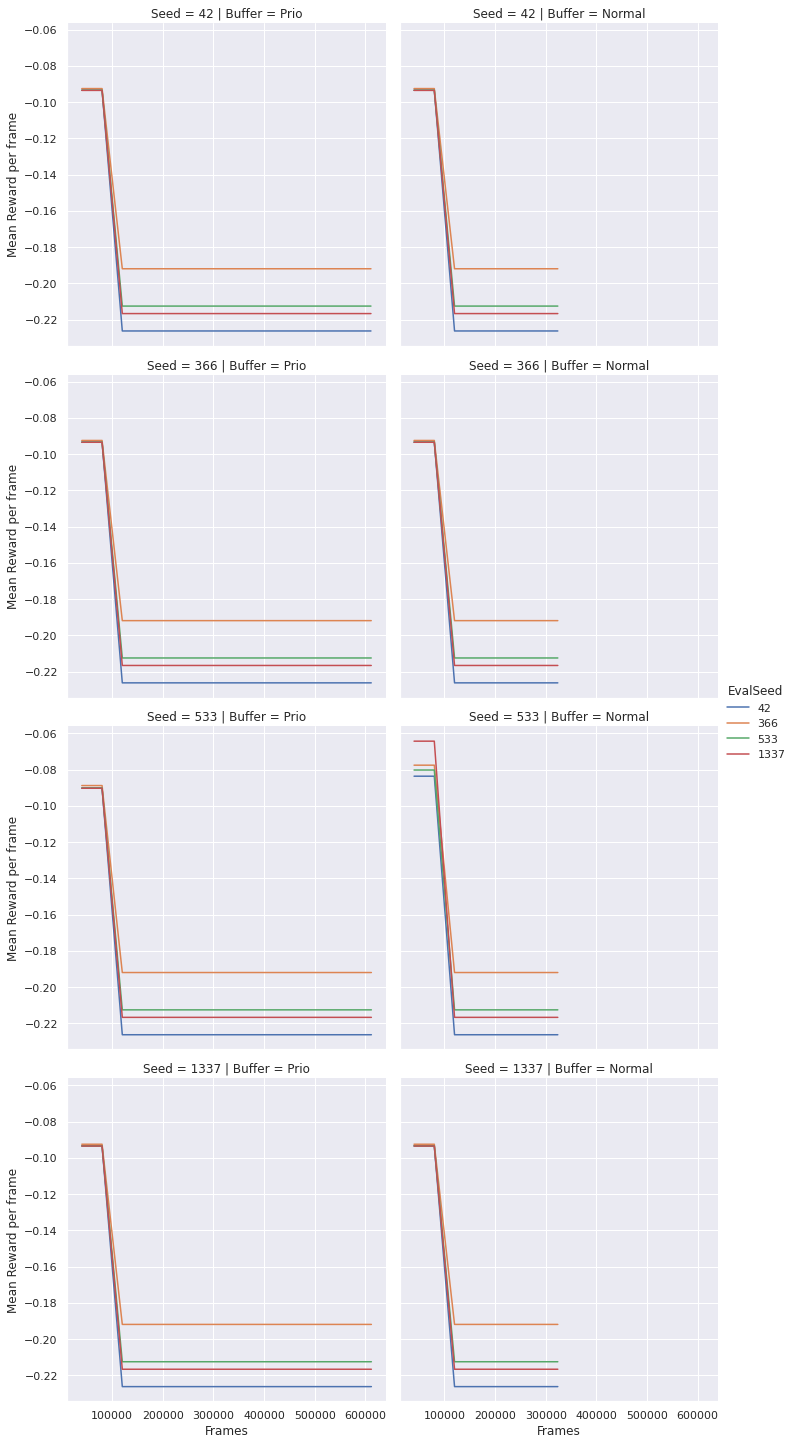

In [8]:
sns.relplot(x="Frames", y="Mean Reward per frame", hue="EvalSeed", row="Seed", col="Buffer", kind="line", data=dfeval)

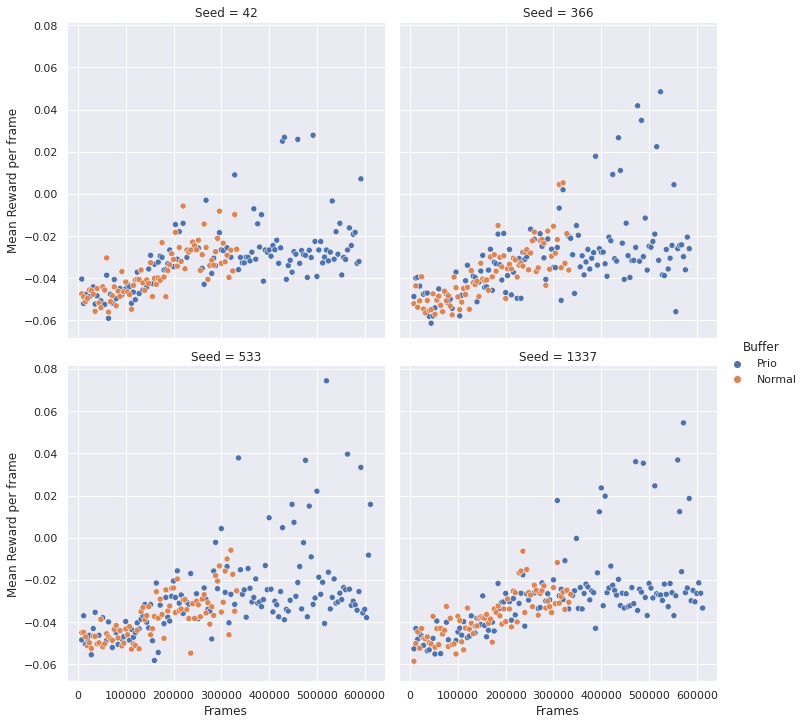

In [9]:
sns.relplot(x="Frames", y="Mean Reward per frame", hue="Buffer", col="Seed", col_wrap=2, data=dfmassive)

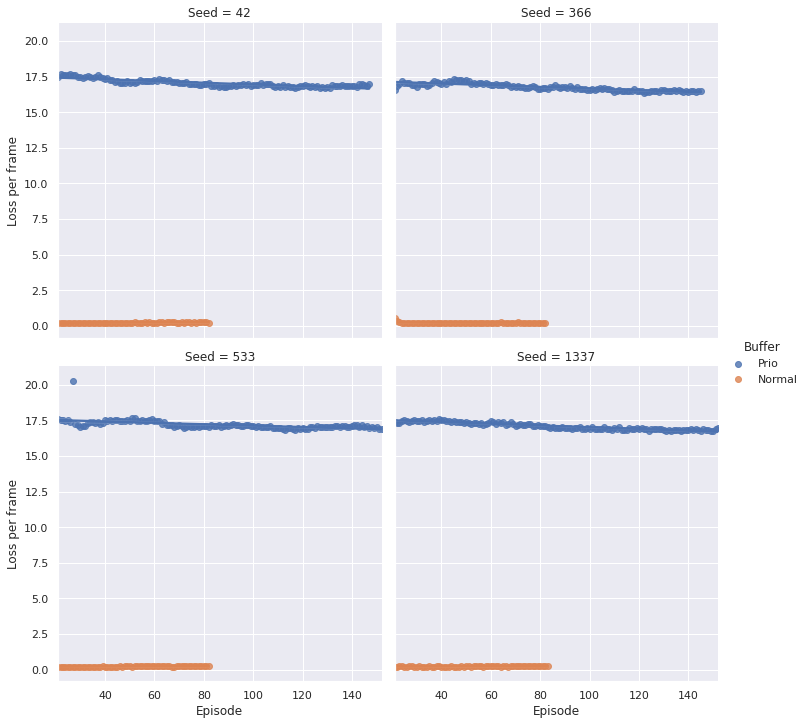

In [10]:
sns.lmplot(x="Episode", y="Loss per frame", hue="Buffer", fit_reg=True, col="Seed", col_wrap=2, data=dfmassive[dfmassive.Episode > 20])

[Text(0.5, 1.0, 'Seed 1337')]

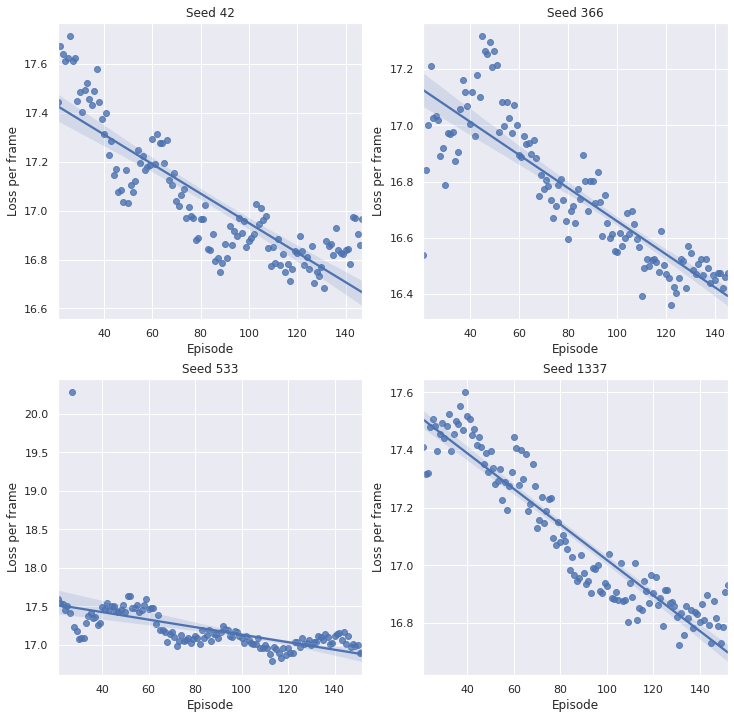

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(12,12))
sns.regplot(x="Episode", y="Loss per frame", fit_reg=True, data=df42[df42.Episode > 20], ax=axs[0][0]).set(title="Seed 42")
sns.regplot(x="Episode", y="Loss per frame", fit_reg=True, data=df366[df366.Episode > 20], ax=axs[0][1]).set(title="Seed 366")
sns.regplot(x="Episode", y="Loss per frame", fit_reg=True, data=df533[df533.Episode > 20], ax=axs[1][0]).set(title="Seed 533")
sns.regplot(x="Episode", y="Loss per frame", fit_reg=True, data=df1337[df1337.Episode > 20], ax=axs[1][1]).set(title="Seed 1337")